<h2> Import </h2>

In [39]:
#IMPORT MODULES, FUNCTIONS AND PACKAGES
from Data.Import import get_data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
get_data()

data = pd.read_csv("Titanic-Dataset.csv")

Path to dataset files: C:\Users\Dario Mikuš\.cache\kagglehub\datasets\yasserh\titanic-dataset\versions\1
Files copied to: ./


<h2> EDA </h2>

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone on board, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

In [12]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<h4> COLUMNS DESCRIPTION </h4> <br>
PassengerId -> Id of the passenger <br>
Survived -> Weather Survived or not: 0 = No, 1 = Yes <br>
Pclass -> Ticket class: 1 = 1st, 2 = 2nd, 3 = 3rd <br>
Name -> Name of a passenger <br>
Sex -> gender "male"/"female" <br>
Age -> Age in Years <br>
SibSp -> No. of siblings / spouses aboard the Titanic <br>
Parch -> No. of parents / children aboard the Titanic <br>
Ticket -> Ticket number <br>
Far -> Passenger fare <br>
Cabin -> Cabin number <br>
Emarked -> Port of Embarkation: C = Cherbourg, Q = Queenstown, S = Southampton <br>

<h5> The dependent variable is "Survived" </h5>

In [19]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [21]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Data consists of 891 observations. </br> </br>
177 observations are missing "Age" information, 687 are missing "Cabin" information and 2 are missing "Emberked" information </br> </br>
The "Survived" mean lower than 0.5 (~0.38) indicates the majority (~62%) of obesrvation did not survive.


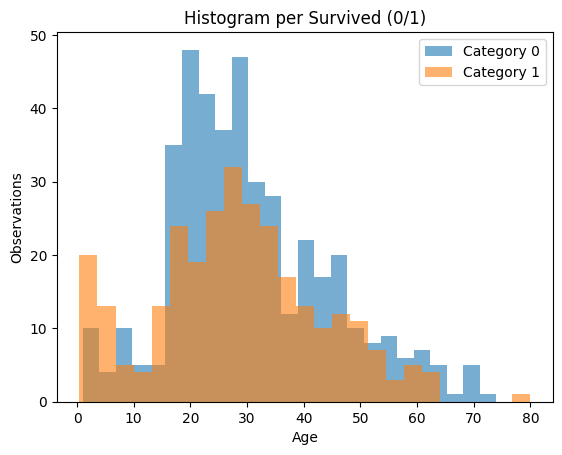

In [ ]:
"""
Role of Age on Surivorship
"""


categories = data['Survived'].unique()
for cat in categories:
    subset = data[data['Survived'] == cat]
    plt.hist(subset['Age'], bins=25, alpha=0.6, label=f'Category {cat}')

plt.legend()
plt.title("Histogram per Survived (0/1)")
plt.xlabel("Age")
plt.ylabel("Observations")
plt.show()

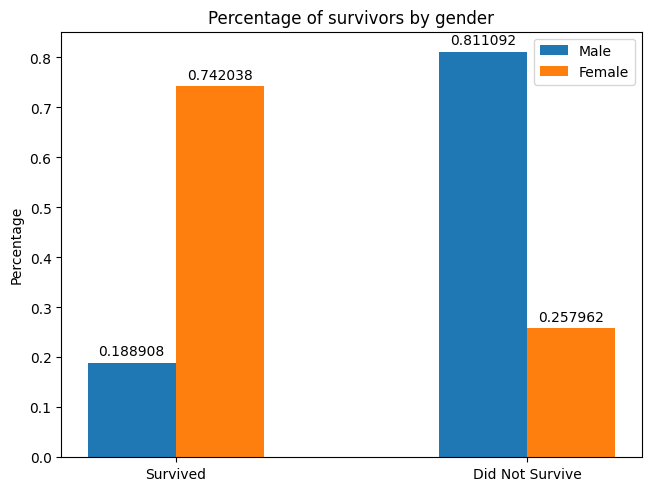

In [51]:
status = ("Survived", "Did Not Survive")

males = len(data[(data["Sex"] == 'male')])
females = len(data[(data["Sex"] == 'female')])

gender_means = {
    'Male': (len(data[(data["Sex"] == 'male') & (data["Survived"] == 1)])/males, len(data[(data["Sex"] == 'male') & (data["Survived"] == 0)])/males),
    'Female': (len(data[(data["Sex"] == 'female') & (data["Survived"] == 1)])/females, len(data[(data["Sex"] == 'female') & (data["Survived"] == 0)])/females)
}

x = np.arange(len(status))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in gender_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage')
ax.set_title('Percentage of survivors by gender')
ax.set_xticks(x + width/2, status)
ax.legend()

plt.show()

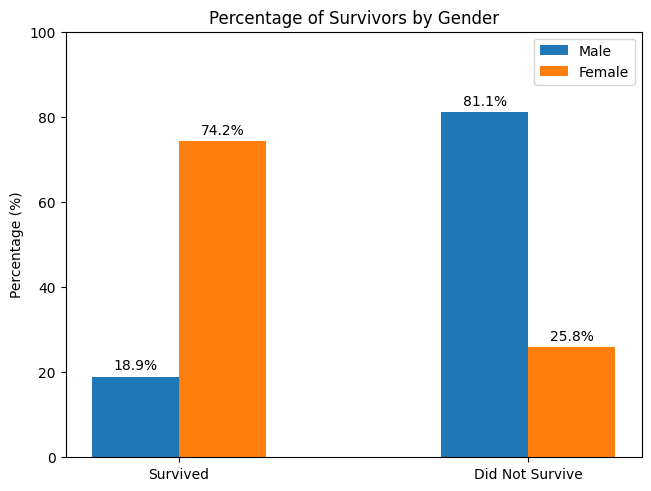

In [ ]:
"""
Role of Sex on Surivorship
"""


status = ("Survived", "Did Not Survive")

males = len(data[data["Sex"] == 'male'])
females = len(data[data["Sex"] == 'female'])

gender_means = {
    'Male': (
        100 * len(data[(data["Sex"] == 'male') & (data["Survived"] == 1)]) / males,
        100 * len(data[(data["Sex"] == 'male') & (data["Survived"] == 0)]) / males
    ),
    'Female': (
        100 * len(data[(data["Sex"] == 'female') & (data["Survived"] == 1)]) / females,
        100 * len(data[(data["Sex"] == 'female') & (data["Survived"] == 0)]) / females
    )
}

x = np.arange(len(status))
width = 0.25
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in gender_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3, fmt='%.1f%%')
    multiplier += 1

ax.set_ylabel('Percentage (%)')
ax.set_title('Percentage of Survivors by Gender')
ax.set_xticks(x + width / 2, status)
ax.set_ylim(0, 100)
ax.legend()

plt.show()


In [69]:
"""
Role of Sex and Status on Surivorship
"""

grouped_data = data.groupby(["Sex", "Pclass"])["Survived"].agg(["sum", "count"]).reset_index()
grouped_data["Survivorship"] = grouped_data["sum"] / grouped_data["count"] * 100


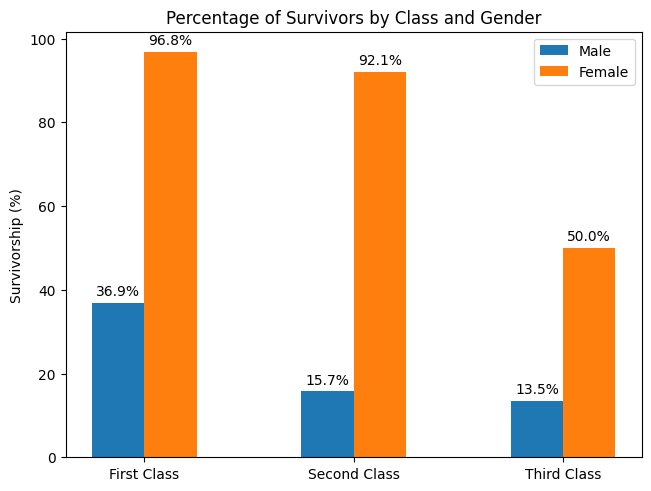

In [72]:
status = ("First Class", "Second Class", "Third Class")

survivorship = {
    'Male': (
        grouped_data[(grouped_data["Sex"] == "male") & (grouped_data["Pclass"] == 1)]["Survivorship"].values[0],
        grouped_data[(grouped_data["Sex"] == "male") & (grouped_data["Pclass"] == 2)]["Survivorship"].values[0],
        grouped_data[(grouped_data["Sex"] == "male") & (grouped_data["Pclass"] == 3)]["Survivorship"].values[0]
    ),
    'Female': (
        grouped_data[(grouped_data["Sex"] == "female") & (grouped_data["Pclass"] == 1)]["Survivorship"].values[0],
        grouped_data[(grouped_data["Sex"] == "female") & (grouped_data["Pclass"] == 2)]["Survivorship"].values[0],
        grouped_data[(grouped_data["Sex"] == "female") & (grouped_data["Pclass"] == 3)]["Survivorship"].values[0]
    )
}

x = np.arange(len(status))
width = 0.25
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in survivorship.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3, fmt='%.1f%%')
    multiplier += 1

ax.set_ylabel('Survivorship (%)')
ax.set_title('Percentage of Survivors by Class and Gender')
ax.set_xticks(x + width /2, status)
ax.legend()
